In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
import pandas as pd
from statistics import mean
import math

# plt.rcParams["figure.figsize"] = (3,3)
print (time.ctime())

Thu Jul  8 13:29:31 2021


In [2]:
# file1 ="E:/Data/AOD332021/AOD_784nm7mW1.8V_100nsPW_8usdelay_10usGW_W0028_H07-210303-144232-1.csv"
file1 ="E:/Data/AOD782022/AOD_DE_160det_Othorder_2s_W0028_H07-220708-165208-1.csv"
print (file1, time.ctime())

data1 = pd.read_csv(file1) # %timeit 1min 9s ± 829 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
print(pd.read_csv(file1, nrows=5))
print(time.ctime())

/home/andrei/Data/TPX3/CHIP0/Test/AOD772021/AOD_772021_2.7V_100nsPW_6usDelay_ZeroOrderOnly_W0028_H07-210707-160804-1.csv Thu Jul  8 13:29:31 2021
   #TrigId     #TrigTime  #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  \
0      943  158647577557   130   118  158648548608       1050            1050   
1      943  158647577557   130   113  158648548608       1025            1025   
2      943  158647577557   131   116  158648548608       1050            1050   
3      943  158647577557   130   114  158648548608       1075            1075   
4      943  158647577557   131   117  158648548608       1050            1050   

   #Trig-ToA[arb]  Unnamed: 8  
0          971051         NaN  
1          971051         NaN  
2          971051         NaN  
3          971051         NaN  
4          971051         NaN  
Thu Jul  8 13:29:56 2021


In [3]:
data1.shape
# , data2.shape

(42763962, 9)

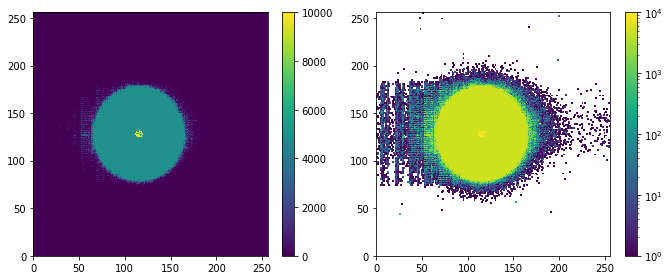

In [4]:
#File 1 grid
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(data1['#Row'], data1['#Col'], bins = 256, range = [(0, 256), (0, 256)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(data1['#Row'], data1['#Col'], bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()

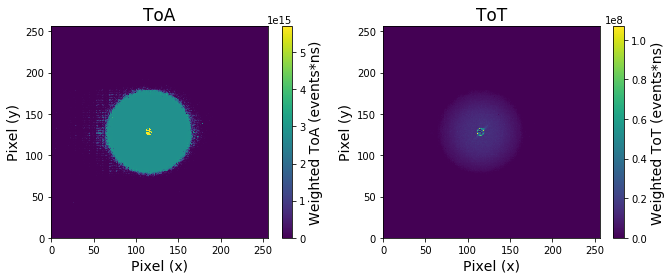

In [9]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')
# data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)]
h = ax0.hist2d(data1['#Row'], 
               data1['#Col'], 
               weights=data1['#ToA'], 
               bins = 256, range = [(0, 256), (0, 256)],
               )
cbar1 = fig.colorbar(h[3], ax = ax0)
#     cbar1.set_ticks([0,50,100,150,200,250])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar1.locator = tick_locator
#     cbar1.update_ticks()
cbar1.set_label('Weighted ToA (events*ns)', fontsize=14)
ax0.set_xlabel('Pixel (x)', fontsize=14)
ax0.set_ylabel('Pixel (y)', fontsize=14)
ax0.set_title('ToA', fontsize=17)

h = ax1.hist2d(data1['#Row'], 
               data1['#Col'], 
               weights=data1['#ToT[arb]'], 
               bins = 256, range = [(0, 256), (0, 256)],
               )
cbar2 = fig.colorbar(h[3], ax = ax1)
#     cbar2.set_ticks([0,300,600,900,1200,1500])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar2.locator = tick_locator
#     cbar2.update_ticks()
cbar2.set_label('Weighted ToT (events*ns)', fontsize=14)
ax1.set_xlabel('Pixel (x)', fontsize=14)
ax1.set_ylabel('Pixel (y)', fontsize=14)
ax1.set_title('ToT', fontsize=17)
fig.tight_layout()

In [6]:
_0thToTsum = np.nansum(data1['#ToT[arb]'].to_numpy())

In [7]:
print(_0thToTsum)

62647653950


In [8]:
%store _0thToTsum

Stored '_0thToTsum' (int64)
